In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import glob
#import seaborn as sns
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

In [3]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

# トシに渡すミアンダリングデータ
20171025-1

In [43]:
vmem = RawCam('/mnt/recordings/SimulationResults/20171025-1/', cam_type='numpy',
             image_height=200, image_width=200, frame_start=0, frame_end=-1)

In [47]:
vmem_data = np.zeros((vmem.data.shape[0], vmem.data.shape[1]*vmem.data.shape[2]))

In [50]:
for i in range(vmem.data.shape[0]):
    vmem_data[i] = vmem.data[i].flatten()

In [56]:
np.save('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171030/spiral_vmem.npy', vmem_data)

# 熱拡散を用いた冷却実験の結果確認

In [59]:
vmem = RawCam('/mnt/recordings/SimulationResults/20171028-1/', cam_type='numpy',
             image_height=200, image_width=200, frame_start=0, frame_end=-1)

In [60]:
vmem_temp = VmemMap(vmem)
vmem.cmap = vmem_temp.cmap

In [61]:
vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171030/20171028-1')

In [64]:
a = np.load('/mnt/recordings/SimulationResults/20171028-1/cell_2400/temp.npy')

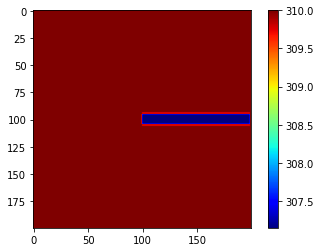

In [65]:
plt.imshow(a.reshape((200, 200)), cmap='jet')
plt.colorbar()

# ヒートマップ研究会用

## 心筋線維走向と平行に冷却した場合

In [31]:
data = [[np.nan, 7, 3, 3],
        [5, 2, 2, 2],
        [2, 2, 1, 1],
        [2, 1, 1, 1]]

In [32]:
sns.set(font_scale=1.4)
sns.heatmap(data, annot=True, fmt="1.0f", cmap='Blues_r', vmin=1, vmax=8, cbar=False)
plt.xlabel(u'Cooling width (mm)', size=20)
plt.ylabel(u'Cooling Temperature (K)', size=20)
plt.xticks([0.5,1.5,2.5,3.5],[0.15, 0.45, 0.75, 1.05], size=18)
plt.yticks([0.5,1.5,2.5,3.5],[-8, -6, -4, -2], size=18)
plt.title('The number of cycles until SW annihilation\n(Cooling direction: 0°)', size=24)
plt.tight_layout()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171030/heatmap_parallel.png', dpi=300)
plt.close()

## 心筋線維走向と45°に冷却した場合

In [33]:
data = [[np.nan, np.nan, np.nan, np.nan],
        [np.nan, np.nan, np.nan, 8],
        [np.nan, np.nan, np.nan, 2],
        [np.nan, np.nan, 2, 2]]

In [34]:
sns.set(font_scale=1.4)
sns.heatmap(data, annot=True, fmt="1.0f", cmap='Blues_r', vmin=1, vmax=8, cbar=False)
plt.xlabel(u'Cooling width (mm)', size=20)
plt.ylabel(u'Cooling Temperature (K)', size=20)
plt.xticks([0.5,1.5,2.5,3.5],[0.15, 0.45, 0.75, 1.05], size=18)
plt.yticks([0.5,1.5,2.5,3.5],[-8, -6, -4, -2], size=18)
plt.title('The number of cycles until SW annihilation\n(Cooling direction: 45°)', size=24)
plt.tight_layout()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171030/heatmap_45.png', dpi=300)
plt.close()

## 心筋線維走向と垂直に冷却した場合

In [35]:
data = [[np.nan, np.nan, np.nan, np.nan],
        [np.nan, np.nan, np.nan, np.nan],
        [np.nan, np.nan, np.nan, 3],
        [np.nan, 6, 2, 2]]

In [37]:
sns.set(font_scale=1.4)
sns.heatmap(data, annot=True, fmt="1.0f", cmap='Blues_r', vmin=1, vmax=8, cbar=False)
plt.xlabel(u'Cooling width (mm)', size=20)
plt.ylabel(u'Cooling Temperature (K)', size=20)
plt.xticks([0.5,1.5,2.5,3.5],[0.15, 0.45, 0.75, 1.05], size=18)
plt.yticks([0.5,1.5,2.5,3.5],[-8, -6, -4, -2], size=18)
cbar = plt.colorbar
plt.title('The number of cycles until SW annihilation\n(Cooling direction: 90°)', size=24)
plt.tight_layout()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171030/heatmap_vertical.png', dpi=300)
plt.close()